/Users/sander.moonemans/Study/MasterThesisRepo/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
INFO:image_embedder:Initializing ImageEmbedder with model 'google/vit-base-patch16-224' on device 'cpu'


Successfully loaded configuration from 'experiments/binary.json'.
Generated ClassConfig: ClassConfig(name='P141703_blue', num_samples=8, image_background_color='blue', image_bar_orientation='diagonal', image_bar_thickness='thick', augment_images=True, augment_images_noise_level=10.0, augment_images_zoom_factor=(1.0, 1.3), augment_texts=False)
Generated ClassConfig: ClassConfig(name='P437311_red', num_samples=8, image_background_color='red', image_bar_orientation='diagonal', image_bar_thickness='thick', augment_images=True, augment_images_noise_level=10.0, augment_images_zoom_factor=(1.0, 1.3), augment_texts=False)
Parsed EmbedderConfig: EmbedderConfig(embedder_name='google/vit-base-patch16-224', device='cpu', preprocessing=PreprocessingConfig(resize=False, resize_size=None, normalize=False, normalization_mean=(0.485, 0.456, 0.406), normalization_std=(0.229, 0.224, 0.225), additional_transforms=None))
Parsed DatasetConfig: DatasetConfig(hdf5_filename='synthetic_dataset.hdf5', features_k

/Users/sander.moonemans/Study/MasterThesisRepo/venv/lib/python3.11/site-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(
Some weights of ViTModel were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized: ['vit.pooler.dense.bias', 'vit.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
INFO:image_embedder:Model 'google/vit-base-patch16-224' loaded successfully.
INFO:image_embedder:Expected image size for embedding: (224, 224)


Created directory: ../data/synthetic_data_binary_class
Created images directory: ../data/synthetic_data_binary_class/images
Created visualizations directory: ../data/synthetic_data_binary_class/visualizations
Saved large image: ../data/synthetic_data_binary_class/images/P141703_blue_Case1_large_7587.png
Saved tile image: ../data/synthetic_data_binary_class/images/P141703_blue_Case1_Tile1_1.png
Saved tile image: ../data/synthetic_data_binary_class/images/P141703_blue_Case1_Tile1_2.png
Saved tile image: ../data/synthetic_data_binary_class/images/P141703_blue_Case1_Tile1_3.png
Saved tile image: ../data/synthetic_data_binary_class/images/P141703_blue_Case1_Tile2_1.png
Saved tile image: ../data/synthetic_data_binary_class/images/P141703_blue_Case1_Tile2_2.png
Saved tile image: ../data/synthetic_data_binary_class/images/P141703_blue_Case1_Tile2_3.png
Saved tile image: ../data/synthetic_data_binary_class/images/P141703_blue_Case1_Tile3_1.png
Saved tile image: ../data/synthetic_data_binary_cla

/Users/sander.moonemans/Study/MasterThesisRepo/venv/lib/python3.11/site-packages/transformers/image_processing_utils.py:41: UserWarning: The following named arguments are not valid for `ViTFeatureExtractor.preprocess` and were ignored: 'normalize'
  return self.preprocess(images, **kwargs)
INFO:image_embedder:Image embedded successfully.
INFO:image_embedder:Saved preprocessed visualization to ../data/synthetic_data_binary_class/visualizations/preprocessing_visualization.png
INFO:image_embedder:Image embedded successfully.
INFO:image_embedder:Image embedded successfully.
INFO:image_embedder:Image embedded successfully.
INFO:image_embedder:Image embedded successfully.
INFO:image_embedder:Image embedded successfully.
INFO:image_embedder:Image embedded successfully.
INFO:image_embedder:Image embedded successfully.
INFO:image_embedder:Image embedded successfully.
INFO:image_embedder:Image embedded successfully.
INFO:image_embedder:Image embedded successfully.
INFO:image_embedder:Image embed

Saved embeddings to ../data/synthetic_data_binary_class/synthetic_dataset_embeddings.csv
Data generation and embedding pipeline completed.
Created 'case-index' with 16 cases.
Saved train case IDs to '../data/synthetic_data_binary_class/case_ids_train.txt'.
Saved val case IDs to '../data/synthetic_data_binary_class/case_ids_val.txt'.
Saved test case IDs to '../data/synthetic_data_binary_class/case_ids_test.txt'.


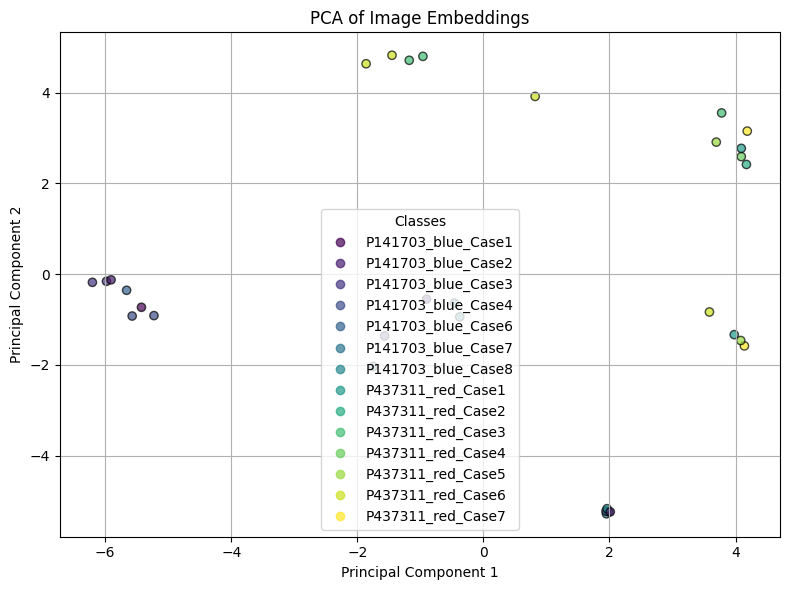

In [1]:
# synthetic_data_pipeline.py

import os
from config import ConfigParser
from synthetic_data_pipeline import SyntheticDataPipeline  # Assuming this is the updated pipeline class

def main():
    # Path to your JSON configuration file
    json_config_path = 'experiments/binary.json'
    
    # Initialize the ConfigParser
    parser = ConfigParser(json_config_path)
    
    # Retrieve the ExperimentConfig
    experiment_config = parser.get_experiment_config()
    
    # Initialize the SyntheticDataPipeline with the parsed configuration
    pipeline = SyntheticDataPipeline(config=experiment_config)
    
    # Run the pipeline (data generation and embedding)
    pipeline.run_with_embedding()
    
    # Save to HDF5
    hdf5_path = os.path.join(experiment_config.output_dir, experiment_config.dataset_config.hdf5_filename)
    pipeline.save_to_hdf5(hdf5_path)
    
    # Optionally, visualize some samples and their embeddings
    def visualize_embeddings(annotations_path: str, embeddings_path: str, images_dir: str, num_samples: int = 32):
        """
        Visualizes embeddings using dimensionality reduction (e.g., PCA or t-SNE).
        
        Parameters:
        - annotations_path: Path to the annotations CSV file.
        - embeddings_path: Path to the embeddings CSV file.
        - images_dir: Directory where images are stored.
        - num_samples: Number of samples to visualize.
        """
        import pandas as pd
        from sklearn.decomposition import PCA
        import matplotlib.pyplot as plt
        
        # Load annotations and embeddings
        annotations = pd.read_csv(annotations_path)
        embeddings = pd.read_csv(embeddings_path)
        
        # Merge on filename
        data = pd.merge(annotations, embeddings, on='filename')
        
        # Ensure we have the desired number of samples
        if num_samples < len(data):
            data = data.sample(n=num_samples, random_state=42)
        
        # Extract embedding vectors
        embedding_cols = [col for col in embeddings.columns if col.startswith('embedding_')]
        X = data[embedding_cols].values
        
        # Reduce dimensions to 2D using PCA
        pca = PCA(n_components=2, random_state=42)
        X_pca = pca.fit_transform(X)
        
        # Encode labels as categorical codes
        label_categories = data['label'].astype('category')
        label_codes = label_categories.cat.codes
        unique_labels = label_categories.cat.categories.tolist()
        
        # Plot
        plt.figure(figsize=(8, 6))
        scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=label_codes, cmap='viridis', edgecolor='k', alpha=0.7)
        
        # Create a legend
        handles, _ = scatter.legend_elements(prop="colors")
        plt.legend(handles, unique_labels, title="Classes")
        
        plt.title('PCA of Image Embeddings')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    
    # Paths
    annotations_path = os.path.join(experiment_config.output_dir, 'annotations.csv')
    embeddings_path = pipeline.embeddings_path  # Already set during embedding
    images_dir = os.path.join(experiment_config.output_dir, 'images')
    
    # Visualize embeddings
    visualize_embeddings(annotations_path, embeddings_path, images_dir, num_samples=32)


main()


INFO:image_embedder:Initializing ImageEmbedder with model 'google/vit-base-patch16-224' on device 'cpu'


Successfully loaded configuration from 'experiments/multiclass.json'.
Generated ClassConfig: ClassConfig(name='P575793_blue', num_samples=2, image_background_color='blue', image_bar_orientation='diagonal', image_bar_thickness='thick', augment_images=True, augment_images_noise_level=10.0, augment_images_zoom_factor=(1.0, 1.3), augment_texts=True)
Generated ClassConfig: ClassConfig(name='P364818_red', num_samples=2, image_background_color='red', image_bar_orientation='diagonal', image_bar_thickness='thick', augment_images=True, augment_images_noise_level=10.0, augment_images_zoom_factor=(1.0, 1.3), augment_texts=True)
Generated ClassConfig: ClassConfig(name='P443891_green', num_samples=2, image_background_color='green', image_bar_orientation='diagonal', image_bar_thickness='thick', augment_images=True, augment_images_noise_level=10.0, augment_images_zoom_factor=(1.0, 1.3), augment_texts=True)
Generated ClassConfig: ClassConfig(name='P997290_yellow', num_samples=2, image_background_color=

/Users/sander.moonemans/Study/MasterThesisRepo/venv/lib/python3.11/site-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(
Some weights of ViTModel were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized: ['vit.pooler.dense.bias', 'vit.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
INFO:image_embedder:Model 'google/vit-base-patch16-224' loaded successfully.
INFO:image_embedder:Expected image size for embedding: (224, 224)


Created directory: ../data/synthetic_data_multi_class
Created images directory: ../data/synthetic_data_multi_class/images
Created visualizations directory: ../data/synthetic_data_multi_class/visualizations
Saved large image: ../data/synthetic_data_multi_class/images/P575793_blue_Case1_large_8515.png
Saved tile image: ../data/synthetic_data_multi_class/images/P575793_blue_Case1_Tile1_1.png
Saved tile image: ../data/synthetic_data_multi_class/images/P575793_blue_Case1_Tile1_2.png
Saved tile image: ../data/synthetic_data_multi_class/images/P575793_blue_Case1_Tile1_3.png
Saved tile image: ../data/synthetic_data_multi_class/images/P575793_blue_Case1_Tile2_1.png
Saved tile image: ../data/synthetic_data_multi_class/images/P575793_blue_Case1_Tile2_2.png
Saved tile image: ../data/synthetic_data_multi_class/images/P575793_blue_Case1_Tile2_3.png
Saved tile image: ../data/synthetic_data_multi_class/images/P575793_blue_Case1_Tile3_1.png
Saved tile image: ../data/synthetic_data_multi_class/images/P5

/Users/sander.moonemans/Study/MasterThesisRepo/venv/lib/python3.11/site-packages/transformers/image_processing_utils.py:41: UserWarning: The following named arguments are not valid for `ViTFeatureExtractor.preprocess` and were ignored: 'normalize'
  return self.preprocess(images, **kwargs)
INFO:image_embedder:Image embedded successfully.


Saved tile image: ../data/synthetic_data_multi_class/images/P877290_navy_Case2_Tile1_3.png
Saved tile image: ../data/synthetic_data_multi_class/images/P877290_navy_Case2_Tile2_1.png
Saved tile image: ../data/synthetic_data_multi_class/images/P877290_navy_Case2_Tile2_2.png
Saved tile image: ../data/synthetic_data_multi_class/images/P877290_navy_Case2_Tile2_3.png
Saved tile image: ../data/synthetic_data_multi_class/images/P877290_navy_Case2_Tile3_1.png
Saved tile image: ../data/synthetic_data_multi_class/images/P877290_navy_Case2_Tile3_2.png
Saved tile image: ../data/synthetic_data_multi_class/images/P877290_navy_Case2_Tile3_3.png
Saved annotations to ../data/synthetic_data_multi_class/annotations.csv
Data generation pipeline completed.


INFO:image_embedder:Saved preprocessed visualization to ../data/synthetic_data_multi_class/visualizations/preprocessing_visualization.png
INFO:image_embedder:Image embedded successfully.
INFO:image_embedder:Image embedded successfully.
INFO:image_embedder:Image embedded successfully.
INFO:image_embedder:Image embedded successfully.
INFO:image_embedder:Image embedded successfully.
INFO:image_embedder:Image embedded successfully.
INFO:image_embedder:Image embedded successfully.
INFO:image_embedder:Image embedded successfully.
INFO:image_embedder:Image embedded successfully.
INFO:image_embedder:Image embedded successfully.
INFO:image_embedder:Image embedded successfully.
INFO:image_embedder:Image embedded successfully.
INFO:image_embedder:Image embedded successfully.
INFO:image_embedder:Image embedded successfully.
INFO:image_embedder:Image embedded successfully.
INFO:image_embedder:Image embedded successfully.
INFO:image_embedder:Image embedded successfully.
INFO:image_embedder:Image emb

Saved embeddings to ../data/synthetic_data_multi_class/synthetic_dataset_embeddings.csv
Data generation and embedding pipeline completed.
Created 'case-index' with 32 cases.
Saved train case IDs to '../data/synthetic_data_multi_class/case_ids_train.txt'.
Saved val case IDs to '../data/synthetic_data_multi_class/case_ids_val.txt'.
Saved test case IDs to '../data/synthetic_data_multi_class/case_ids_test.txt'.


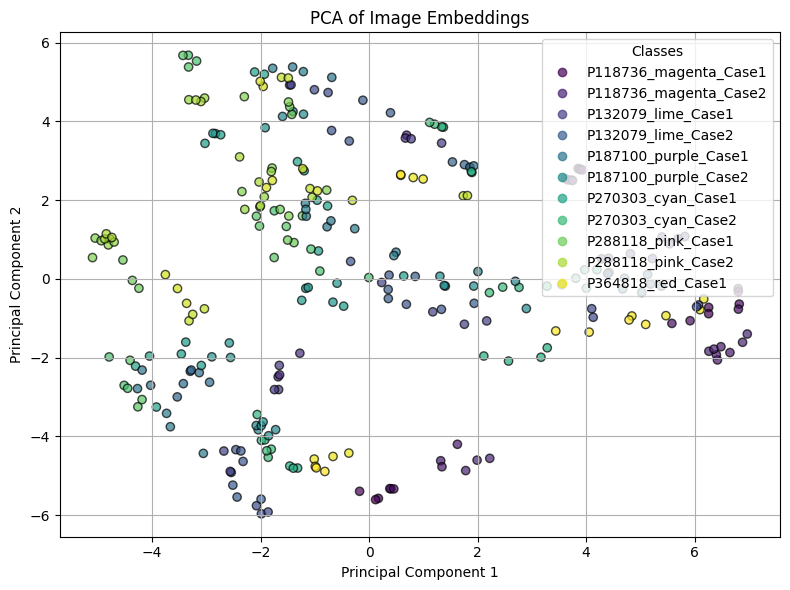

In [ ]:
# synthetic_data_pipeline.py

import os
from config import ConfigParser
from synthetic_data_pipeline import SyntheticDataPipeline  # Assuming this is the updated pipeline class

def main():
    # Path to your JSON configuration file
    json_config_path = 'experiments/multiclass.json'
    
    # Initialize the ConfigParser
    parser = ConfigParser(json_config_path)
    
    # Retrieve the ExperimentConfig
    experiment_config = parser.get_experiment_config()
    
    # Initialize the SyntheticDataPipeline with the parsed configuration
    pipeline = SyntheticDataPipeline(config=experiment_config)
    
    # Run the pipeline (data generation and embedding)
    pipeline.run_with_embedding()
    
    # Save to HDF5
    hdf5_path = os.path.join(experiment_config.output_dir, experiment_config.dataset_config.hdf5_filename)
    pipeline.save_to_hdf5(hdf5_path)
    
    # Optionally, visualize some samples and their embeddings
    def visualize_embeddings(annotations_path: str, embeddings_path: str, images_dir: str, num_samples: int = 32):
        """
        Visualizes embeddings using dimensionality reduction (e.g., PCA or t-SNE).
        
        Parameters:
        - annotations_path: Path to the annotations CSV file.
        - embeddings_path: Path to the embeddings CSV file.
        - images_dir: Directory where images are stored.
        - num_samples: Number of samples to visualize.
        """
        import pandas as pd
        from sklearn.decomposition import PCA
        import matplotlib.pyplot as plt
        
        # Load annotations and embeddings
        annotations = pd.read_csv(annotations_path)
        embeddings = pd.read_csv(embeddings_path)
        
        # Merge on filename
        data = pd.merge(annotations, embeddings, on='filename')

        num_samples = len(data)
        
        # Ensure we have the desired number of samples
        if num_samples < len(data):
            data = data.sample(n=num_samples, random_state=42)
        
        # Extract embedding vectors
        embedding_cols = [col for col in embeddings.columns if col.startswith('embedding_')]
        X = data[embedding_cols].values
        
        # Reduce dimensions to 2D using PCA
        pca = PCA(n_components=2, random_state=42)
        X_pca = pca.fit_transform(X)
        
        # Encode labels as categorical codes
        label_categories = data['label'].astype('category')
        label_codes = label_categories.cat.codes
        unique_labels = label_categories.cat.categories.tolist()
        
        # Plot
        plt.figure(figsize=(8, 6))
        scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=label_codes, cmap='viridis', edgecolor='k', alpha=0.7)
        
        # Create a legend
        handles, _ = scatter.legend_elements(prop="colors")
        plt.legend(handles, unique_labels, title="Classes")
        
        plt.title('PCA of Image Embeddings')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    
    # Paths
    annotations_path = os.path.join(experiment_config.output_dir, 'annotations.csv')
    embeddings_path = pipeline.embeddings_path  # Already set during embedding
    images_dir = os.path.join(experiment_config.output_dir, 'images')
    
    # Visualize embeddings
    visualize_embeddings(annotations_path, embeddings_path, images_dir, num_samples=32)

main()


In [ ]:
import os
from config import ConfigParser
from synthetic_data_pipeline import SyntheticDataPipeline

def main():
    # Path to your JSON configuration file
    json_config_path = 'experiments/great_variety.json'
    
    # Initialize the ConfigParser
    parser = ConfigParser(json_config_path)
    
    # Retrieve the ExperimentConfig
    experiment_config = parser.get_experiment_config()
    
    # Initialize the SyntheticDataPipeline with the parsed configuration
    pipeline = SyntheticDataPipeline(config=experiment_config)
    
    # Run the pipeline (data generation and embedding)
    pipeline.run_with_embedding()
    
    # Save to HDF5
    hdf5_path = os.path.join(experiment_config.output_dir, experiment_config.dataset_config.hdf5_filename)
    pipeline.save_to_hdf5(hdf5_path)
    
main()


/Users/sander.moonemans/Study/MasterThesisRepo/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
INFO:image_embedder:Initializing ImageEmbedder with model 'google/vit-base-patch16-224' on device 'cpu'


Successfully loaded configuration from 'experiments/multiclass_v2.json'.
Generated ClassConfig: ClassConfig(name='P261315_blue', num_samples=2, image_background_color='blue', image_bar_orientation='diagonal', image_bar_thickness='thick', augment_images=True, augment_images_noise_level=10.0, augment_images_zoom_factor=(1.0, 1.3), augment_texts=True)
Generated ClassConfig: ClassConfig(name='P750078_red', num_samples=2, image_background_color='red', image_bar_orientation='diagonal', image_bar_thickness='thick', augment_images=True, augment_images_noise_level=10.0, augment_images_zoom_factor=(1.0, 1.3), augment_texts=True)
Generated ClassConfig: ClassConfig(name='P205843_green', num_samples=2, image_background_color='green', image_bar_orientation='diagonal', image_bar_thickness='thick', augment_images=True, augment_images_noise_level=10.0, augment_images_zoom_factor=(1.0, 1.3), augment_texts=True)
Generated ClassConfig: ClassConfig(name='P850776_yellow', num_samples=2, image_background_col

/Users/sander.moonemans/Study/MasterThesisRepo/venv/lib/python3.11/site-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(
Some weights of ViTModel were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized: ['vit.pooler.dense.bias', 'vit.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
INFO:image_embedder:Model 'google/vit-base-patch16-224' loaded successfully.
INFO:image_embedder:Expected image size for embedding: (224, 224)


Created directory: ../data/synthetic_data_multi_class_v2
Created images directory: ../data/synthetic_data_multi_class_v2/images
Created visualizations directory: ../data/synthetic_data_multi_class_v2/visualizations
Saved large image: ../data/synthetic_data_multi_class_v2/images/P261315_blue_Case1_large_2314.png
Saved tile image: ../data/synthetic_data_multi_class_v2/images/P261315_blue_Case1_Tile1_1.png
Saved tile image: ../data/synthetic_data_multi_class_v2/images/P261315_blue_Case1_Tile1_2.png
Saved tile image: ../data/synthetic_data_multi_class_v2/images/P261315_blue_Case1_Tile1_3.png
Saved tile image: ../data/synthetic_data_multi_class_v2/images/P261315_blue_Case1_Tile2_1.png
Saved tile image: ../data/synthetic_data_multi_class_v2/images/P261315_blue_Case1_Tile2_2.png
Saved tile image: ../data/synthetic_data_multi_class_v2/images/P261315_blue_Case1_Tile2_3.png
Saved tile image: ../data/synthetic_data_multi_class_v2/images/P261315_blue_Case1_Tile3_1.png
Saved tile image: ../data/syn

/Users/sander.moonemans/Study/MasterThesisRepo/venv/lib/python3.11/site-packages/transformers/image_processing_utils.py:41: UserWarning: The following named arguments are not valid for `ViTFeatureExtractor.preprocess` and were ignored: 'normalize'
  return self.preprocess(images, **kwargs)
INFO:image_embedder:Image embedded successfully.
INFO:image_embedder:Saved preprocessed visualization to ../data/synthetic_data_multi_class_v2/visualizations/preprocessing_visualization.png
INFO:image_embedder:Image embedded successfully.
INFO:image_embedder:Image embedded successfully.
INFO:image_embedder:Image embedded successfully.
INFO:image_embedder:Image embedded successfully.
INFO:image_embedder:Image embedded successfully.
INFO:image_embedder:Image embedded successfully.
INFO:image_embedder:Image embedded successfully.
INFO:image_embedder:Image embedded successfully.
INFO:image_embedder:Image embedded successfully.
INFO:image_embedder:Image embedded successfully.
INFO:image_embedder:Image emb

Saved embeddings to ../data/synthetic_data_multi_class_v2/synthetic_dataset_embeddings.csv
Data generation and embedding pipeline completed.
Saved zero-shot textual-to-ID labels to '../data/synthetic_data_multi_class_v2/zero_shot_textual_to_id.json'.
Saved zero-shot specimen-to-ID labels to '../data/synthetic_data_multi_class_v2/zero_shot_specimen_to_id.json'.
Saved data for batch 0 to '/Users/sander.moonemans/Study/MasterThesisRepo/data/synthetic_data_multi_class_v2/synth_superbatches/data_0'.
Saved text annotations to '../data/synthetic_data_multi_class_v2/text_annotations.json'.
Saved train case IDs to '../data/synthetic_data_multi_class_v2/case_ids_train.txt'.
Saved val case IDs to '../data/synthetic_data_multi_class_v2/case_ids_val.txt'.
Saved test case IDs to '../data/synthetic_data_multi_class_v2/case_ids_test.txt'.


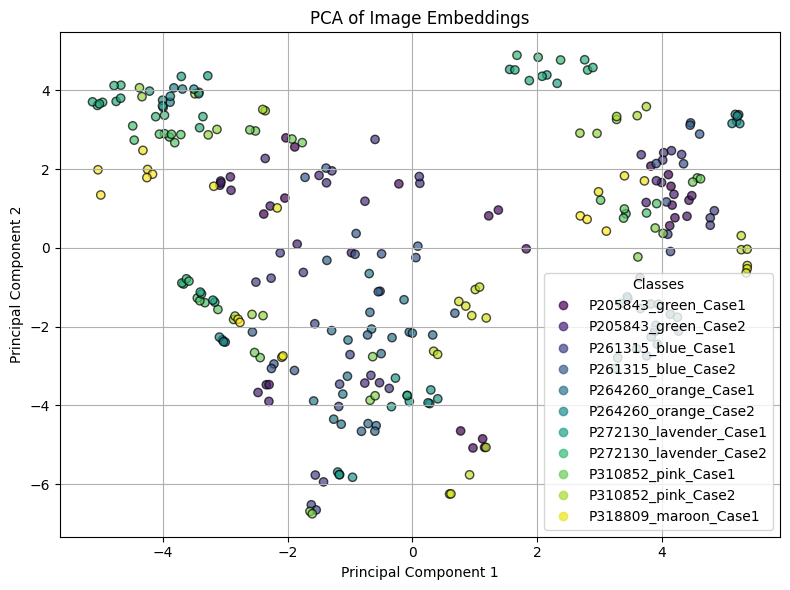

In [1]:
# synthetic_data_pipeline.py

import os
from config import ConfigParser
from synthetic_data_pipeline import SyntheticDataPipeline  # Assuming this is the updated pipeline class

def main():
    # Path to your JSON configuration file
    json_config_path = 'experiments/multiclass_v2.json'
    
    # Initialize the ConfigParser
    parser = ConfigParser(json_config_path)
    
    # Retrieve the ExperimentConfig
    experiment_config = parser.get_experiment_config()
    
    # Initialize the SyntheticDataPipeline with the parsed configuration
    pipeline = SyntheticDataPipeline(config=experiment_config)
    
    # Run the pipeline (data generation and embedding)
    pipeline.run_with_embedding()

    pipeline.create_zero_shot_labels()
    
    # Save to HDF5
    pipeline.save_to_file_structure(output_dir="/Users/sander.moonemans/Study/MasterThesisRepo/data/synthetic_data_multi_class_v2/synth_superbatches")

    # Optionally, visualize some samples and their embeddings
    def visualize_embeddings(annotations_path: str, embeddings_path: str, images_dir: str, num_samples: int = 32):
        """
        Visualizes embeddings using dimensionality reduction (e.g., PCA or t-SNE).
        
        Parameters:
        - annotations_path: Path to the annotations CSV file.
        - embeddings_path: Path to the embeddings CSV file.
        - images_dir: Directory where images are stored.
        - num_samples: Number of samples to visualize.
        """
        import pandas as pd
        from sklearn.decomposition import PCA
        import matplotlib.pyplot as plt
        
        # Load annotations and embeddings
        annotations = pd.read_csv(annotations_path)
        embeddings = pd.read_csv(embeddings_path)
        
        # Merge on filename
        data = pd.merge(annotations, embeddings, on='filename')

        num_samples = len(data)
        
        # Ensure we have the desired number of samples
        if num_samples < len(data):
            data = data.sample(n=num_samples, random_state=42)
        
        # Extract embedding vectors
        embedding_cols = [col for col in embeddings.columns if col.startswith('embedding_')]
        X = data[embedding_cols].values
        
        # Reduce dimensions to 2D using PCA
        pca = PCA(n_components=2, random_state=42)
        X_pca = pca.fit_transform(X)
        
        # Encode labels as categorical codes
        label_categories = data['label'].astype('category')
        label_codes = label_categories.cat.codes
        unique_labels = label_categories.cat.categories.tolist()
        
        # Plot
        plt.figure(figsize=(8, 6))
        scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=label_codes, cmap='viridis', edgecolor='k', alpha=0.7)
        
        # Create a legend
        handles, _ = scatter.legend_elements(prop="colors")
        plt.legend(handles, unique_labels, title="Classes")
        
    
        plt.title('PCA of Image Embeddings')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    
    # Paths
    annotations_path = os.path.join(experiment_config.output_dir, 'annotations.csv')
    embeddings_path = pipeline.embeddings_path  # Already set during embedding
    images_dir = os.path.join(experiment_config.output_dir, 'images')
    
    # Visualize embeddings
    visualize_embeddings(annotations_path, embeddings_path, images_dir, num_samples=32)

main()
